# Import the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_style('darkgrid')
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

# Read CSV

In [2]:
data = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

# Features Selections

## Identifies the column with numerical values

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data1 = data.select_dtypes(include=numerics)
test1 = test.select_dtypes(include=numerics)

## Identifies the correlation between the numerical columns and sales Price

In [4]:
important_num_cols = list(data1.corr()["SalePrice"][(data1.corr()["SalePrice"]>0.50) | (data1.corr()["SalePrice"]<-0.50)].index)
cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Functional', 'BldgType', 'HouseStyle', 'GarageCond']
important_cols = important_num_cols + cat_cols
important_cols.remove('SalePrice')

# Data Preprocessing

## Combine Train and Test

In [5]:
data2 = data[important_cols]
test2 = test[important_cols]
data3 = pd.concat([data2, test2], axis=0).reset_index(drop=True)
data4 = data3.copy()
data4

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Functional,BldgType,HouseStyle,GarageCond
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Typ,1Fam,2Story,TA
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Typ,1Fam,1Story,TA
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Typ,1Fam,2Story,TA
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Typ,1Fam,2Story,TA
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Typ,1Fam,2Story,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Typ,Twnhs,2Story,NaN
2915,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Typ,TwnhsE,2Story,TA
2916,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Typ,1Fam,1Story,TA
2917,5,1992,1992,912.0,970,970,1,6,0.0,0.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Typ,1Fam,SFoyer,NaN


## Finding the null columns

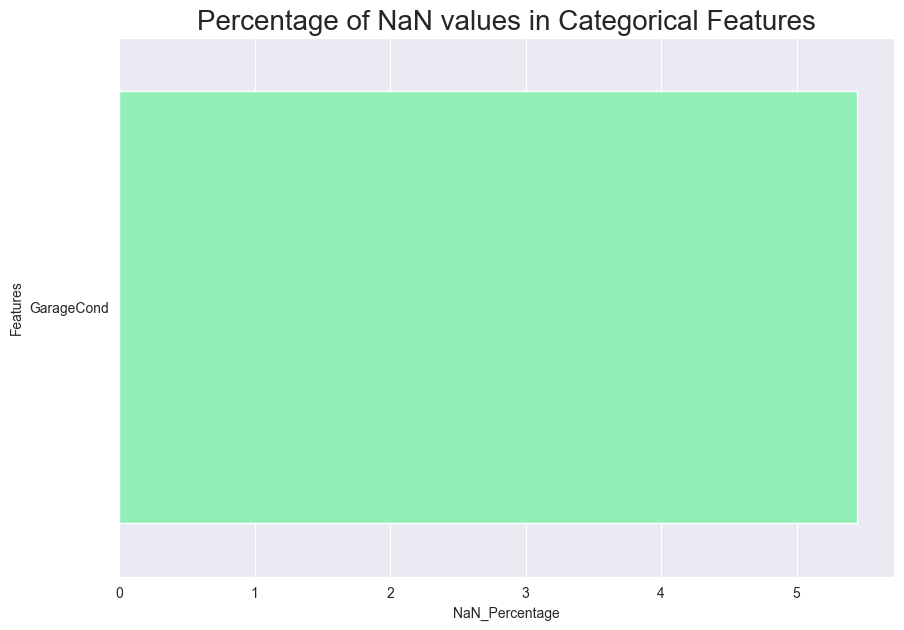

We can remove features with NaN values that are more than 50%.


In [6]:
features_null_prcnt = []
features_drop_list = []
exceed_prcnt = 50
columns = data4.columns
for col in columns:
    prcnt = len(data4[col][data4[col].isna() == True]) / len(data4[col])*100
    if (prcnt > exceed_prcnt):
        features_drop_list.append(col)
    features_null_prcnt.append(prcnt)
Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Percentage': features_null_prcnt}).sort_values(by = 'NaN_Percentage', ascending = False)
Nan_values = Nan_values[Nan_values.NaN_Percentage > 1]
 
plt.figure(figsize=(10,7))
plt.title('Percentage of NaN values in Categorical Features', size = 20)
plt.xlabel("Features with Highest NaN values")
sns.barplot(x = Nan_values.NaN_Percentage, y = Nan_values.Features, orient = 'h', palette = 'rainbow')
plt.show()
print('We can remove features with NaN values that are more than ' + str(exceed_prcnt) + '%.')

In [18]:
print("Missing Values by Column")
print("-"*30)
print(data4.select_dtypes(include='int64').isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",data4.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [8]:

for column in [
    'GarageCond'
]:
    data2[column] = data2[column].fillna('None')

# Impute using the column mode
for column in [
'MSZoning', 
'Street', 
'LotShape', 
'LandContour', 
'Utilities', 
'LotConfig', 
'LandSlope', 
'Neighborhood', 
'Functional', 
'BldgType', 
'HouseStyle'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

/var/folders/r3/whw8vvrd3fq2y8c483b_s4900000gn/T/ipykernel_6471/2107074345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column] = data2[column].fillna('None')
/var/folders/r3/whw8vvrd3fq2y8c483b_s4900000gn/T/ipykernel_6471/2107074345.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[column] = data2[column].fillna(data2[column].mode()[0])
/var/folders/r3/whw8vvrd3fq2y8c483b_s4900000gn/T/ipykernel_6471/2107074345.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [9]:
data3 = data2.copy()

In [10]:
for column in [
    'OverallQual',
    'YearBuilt',
    'YearRemodAdd',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea',
    'FullBath',
    'TotRmsAbvGrd',
    'GarageCars',
    'GarageArea'
]:
    data3[column] = data3[column].fillna(data3[column].mean())

In [11]:
data4 = data3.copy()

In [12]:
print("Missing Values by Column")
print("-"*30)
print(data3.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",data3.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
MSZoning        0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Functional      0
BldgType        0
HouseStyle      0
GarageCond      0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [13]:
data4 = pd.get_dummies(data4)
data5 = data4.copy()

In [14]:
scaler = StandardScaler()
scaler.fit(data5)

data6 = pd.DataFrame(scaler.transform(data5), index=data5.index, columns=data5.columns)

In [15]:
data6

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,0.237571,-0.215859,-0.094785,-0.10854,-0.037037,-0.105263,-0.203395,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.098397,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.994535,-0.074227,-0.087129,1.510265,-0.16125,-0.215859,-0.037037,-0.156721,-0.078757,-0.24236,-0.069409,0.317893
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618,-0.468739,-0.262324,5.483049,-0.052414,-1.605749,0.237571,-0.215859,-0.094785,-0.10854,-0.037037,-0.105263,-0.203395,-0.139832,-0.338384,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,11.477250,-0.098397,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,1.005495,-0.074227,-0.087129,-0.662136,-0.16125,-0.215859,-0.037037,-0.156721,-0.078757,-0.24236,-0.069409,0.317893
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,1.420045,-0.169981,-0.083045,-1.314904,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,0.237571,-0.215859,-0.094785,-0.10854,-0.037037,-0.105263,-0.203395,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.098397,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.994535,-0.074227,-0.087129,1.510265,-0.16125,-0.215859,-0.037037,-0.156721,-0.078757,-0.24236,-0.069409,0.317893
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,-0.083045,-0

In [16]:
data7 = data6.copy()

NameError: name 'target' is not defined

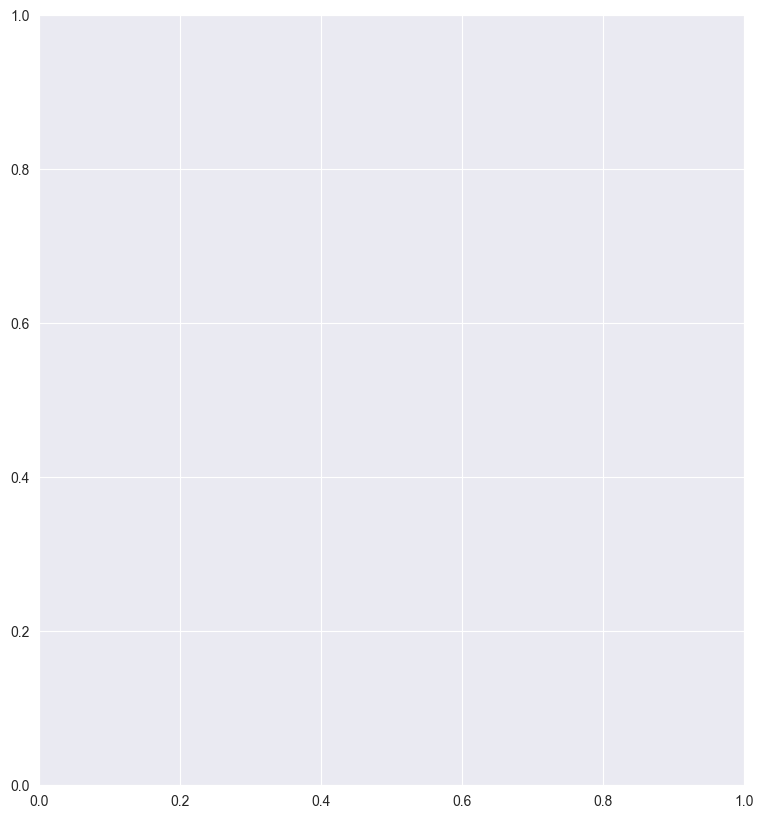

In [17]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [ ]:
log_target = np.log(target)

In [ ]:
train_final = data7.loc[:data.index.max(), :].copy()
test_final = data7.loc[data.index.max() + 1:, :].reset_index(drop=True).copy()

In [ ]:
train_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA
0,0.646183,1.046258,0.896833,-0.444328,-0.773861,0.413547,0.781366,0.986849,0.306528,0.348900,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,-0.704383,-0.1635,-0.07424,0.755115,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,3.151600,-0.191250,-0.266820,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.091050,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
1,-0.063185,0.154764,-0.395604,0.477111,0.261075,-0.471891,0.781366,-0.287758,0.306528,-0.059792,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,-0.704383,-0.1635,-0.07424,0.755115,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,5.774182,-0.069421,-1.647343,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.191250,-0.266820,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,10.982941,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,0.992151,-0.052423,-0.09105,-0.652679,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
2,0.646183,0.980221,0.848965,-0.299076,-0.610718,0.563755,0.781366,-0.287758,0.306528,0.627553,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,1.419682,-0.1635,-0.07424,-1.324301,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,3.151600,-0.191250,-0.266820,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.091050,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
3,0.646183,-1.859351,-0.682812,-0.671283,-0.506205,0.427382,-1.027363,0.349546,1.619961,

In [ ]:
test_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA
0,-0.772552,-0.340510,-1.113625,-0.385319,-0.671897,-1.195262,-1.027363,-0.925062,-1.006906,1.194149,-0.092944,-0.223607,10.548423,-1.868360,-0.432513,-0.064249,0.064249,-0.704383,-0.1635,-0.07424,0.755115,-0.204343,-0.207057,-0.144867,0.336560,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.19125,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,2.364141,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.09105,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,0.992151,-0.052423,-0.09105,-0.652679,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
1,-0.063185,-0.439565,-1.257229,0.629171,0.431865,-0.339470,-1.027363,-0.287758,-1.006906,-0.747138,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,1.419682,-0.1635,-0.07424,-1.324301,-0.204343,-0.207057,-0.144867,0.336560,0.018512,-0.018512,2.170790,-0.253305,-0.173185,-0.069421,-1.647343,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.19125,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,2.364141,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.09105,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,0.992151,-0.052423,-0.09105,-0.652679,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
2,-0.772552,0.848148,0.657493,-0.280920,-0.590326,0.253457,0.781366,-0.287758,0.306528,0.042381,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,1.419682,-0.1635,-0.07424,-1.324301,-0.204343,-0.207057,-0.144867,0.336560,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.19125,-0.26682,4.085451,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.09105,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
3,-0.063185,0.881166,0.657493,-0.285459,-0.595424,0.204046,0.781366,0.349546,0.3065

In [ ]:
knn = KNeighborsRegressor()
knn.fit(train_final, target)
pred_y = knn.predict(test_final)

In [ ]:
submission = pd.concat([test_ids, pd.Series(pred_y, name='SalePrice')], axis=1)

In [ ]:
submission.to_csv('./submission4.csv', index=False, header=True)